Use the new cice grid scripts and compare it to the old results

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_script_path = '/g/data/tm70/as2285/om3-scripts/grid_generation/Gen_CICE_grid.py'

In [3]:
_data_dir = '/g/data/ik11/inputs/access-om2/input_eee21b65'

In [4]:
cd /g/data/tm70/as2285/om3-scripts/grid_generation

/g/data/tm70/as2285/om3-scripts/grid_generation


In [5]:
res = ['1deg', '025deg', '01deg']

Let set our tolerance to 2e-6 as precision of float32 is 1e.6:

In [7]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

Plot all the differences in all vars and resolutions:

0.3.0
1deg
new vars not in old?
set()
missing vars in new?
{'lont_bonds', 'hun', 'hue', 'lonu_bonds', 'latu_bonds', 'latt_bonds'}
025deg
new vars not in old?
set()
missing vars in new?
set()
01deg
new vars not in old?
set()
missing vars in new?
{'clon_t', 'clat_u', 'clat_t', 'clon_u'}


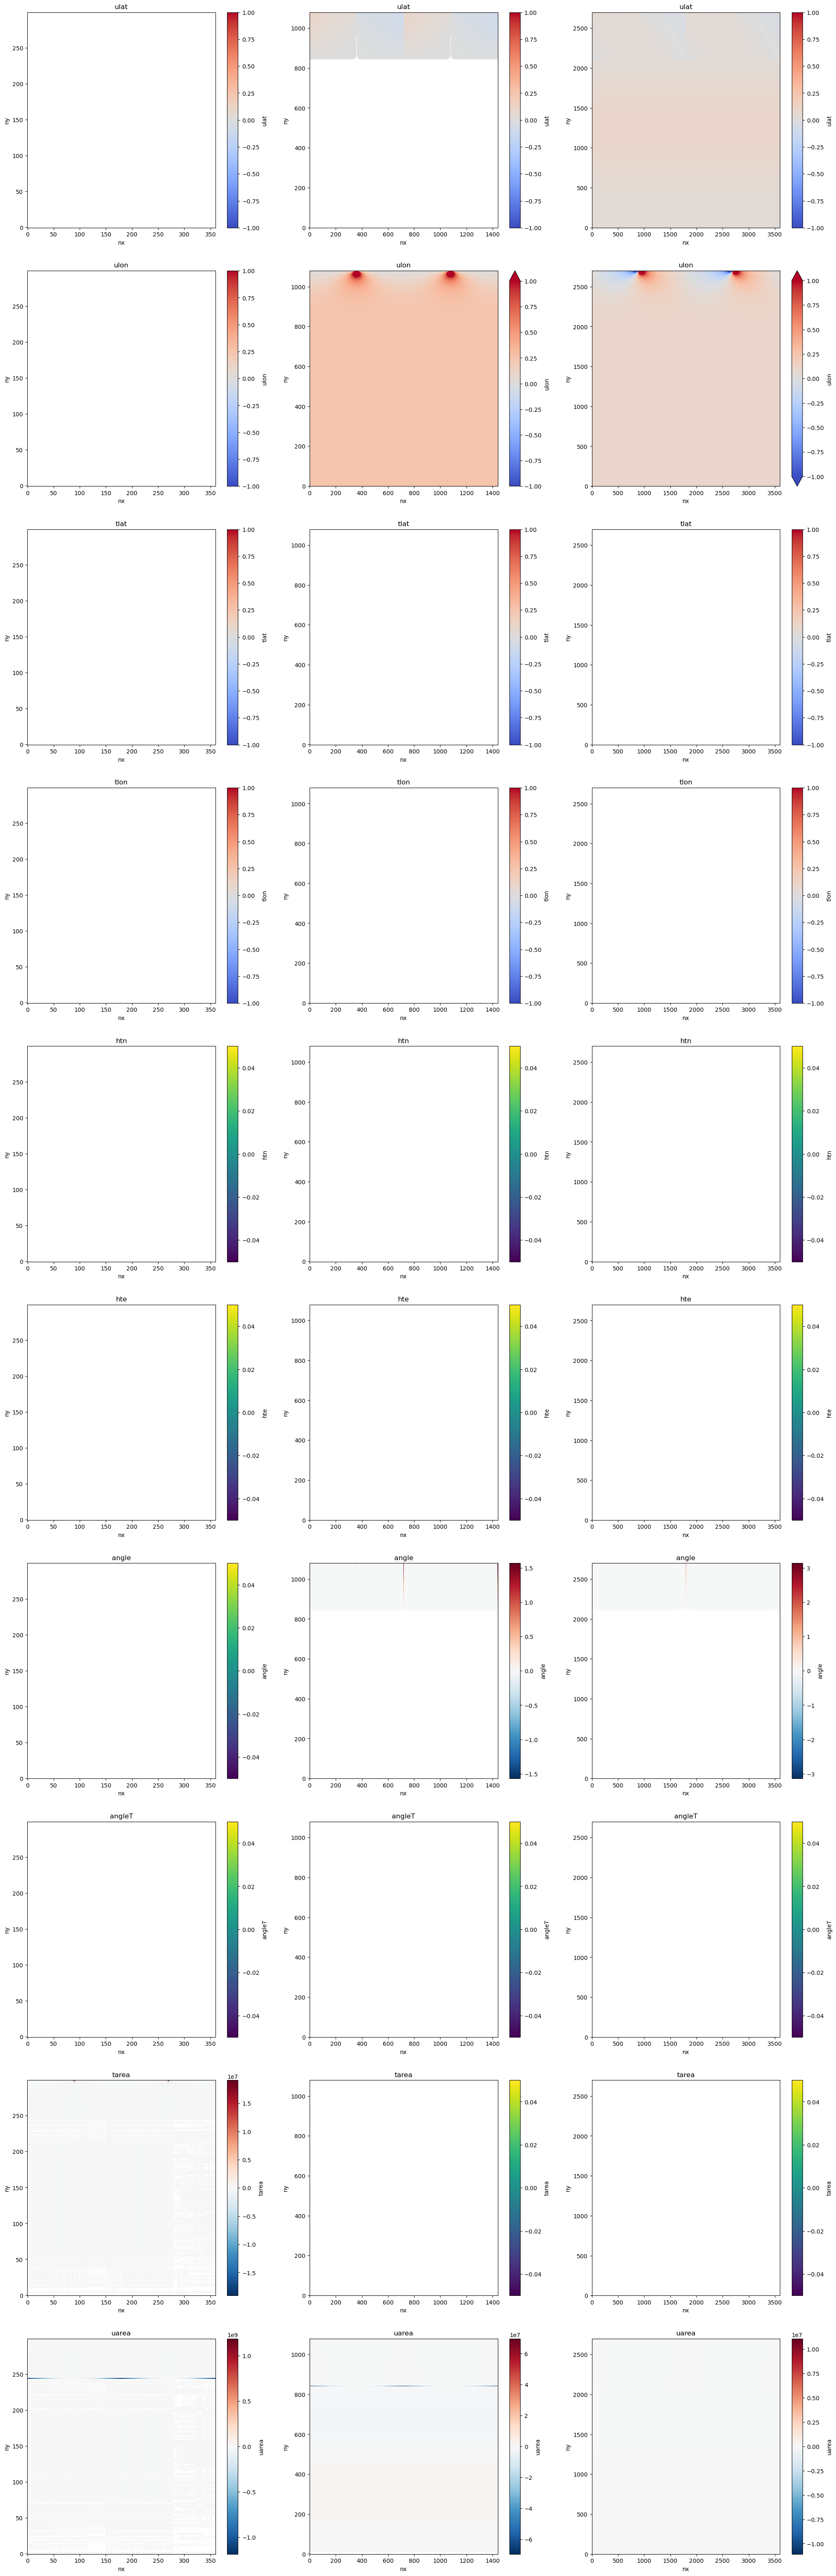

In [8]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'grid_{iRes}.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.data_vars).difference(old_cice_grid.data_vars))
    print("missing vars in new?")
    print(set(old_cice_grid.data_vars).difference(new_cice_grid.data_vars))
    
    for j,jVar in enumerate(new_cice_grid.data_vars):
        
        plt.subplot(
            len(new_cice_grid.data_vars),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)
        
        if (jVar in (['ulat','ulon','tlat','tlon'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

More detail on 0.1 degree ulat/ulon and angle

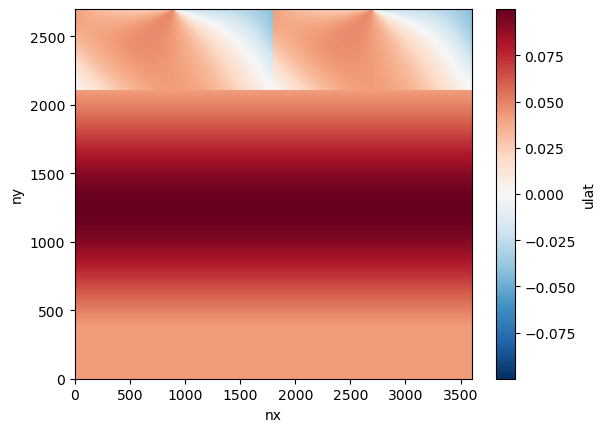

In [9]:
np.rad2deg((new_cice_grid-old_cice_grid).ulat).plot()

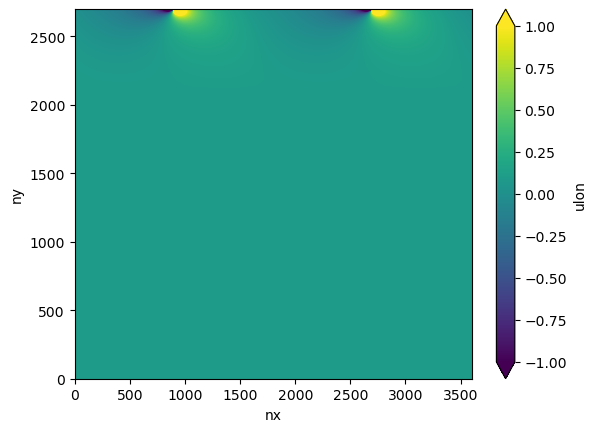

In [10]:
np.rad2deg((new_cice_grid-old_cice_grid).ulon).plot(vmin=-1, vmax=1)

Note how x is offset by 1:

In [13]:
np.rad2deg(new_cice_grid.ulat[-2:,-2:])

<xarray.DataArray 'ulat' (ny: 2, nx: 2)>
array([[65.03653942, 64.99430221],
       [65.03653965, 64.99430221]])
Dimensions without coordinates: ny, nx
Attributes:
    units:    radians
    title:    Latitude of U points

In [14]:
np.rad2deg(old_cice_grid.ulat[-2:,-2:])

<xarray.DataArray 'ulat' (ny: 2, nx: 2)>
array([[65.07870858, 65.03653872],
       [65.07870998, 65.03653942]])
Dimensions without coordinates: ny, nx
Attributes:
    units:    radians
    title:    Latitude of U points

And y is offset by 1:

In [15]:
np.rad2deg(new_cice_grid.ulon[0:2,0:2])

<xarray.DataArray 'ulon' (ny: 2, nx: 2)>
array([[-279.9, -279.8],
       [-279.9, -279.8]])
Dimensions without coordinates: ny, nx
Attributes:
    units:    radians
    title:    Longitude of U points

In [16]:
np.rad2deg(old_cice_grid.ulon[0:2,0:2])

<xarray.DataArray 'ulon' (ny: 2, nx: 2)>
array([[-280. , -279.9],
       [-280. , -279.9]])
Dimensions without coordinates: ny, nx
Attributes:
    units:    radians
    title:    Longitude of U points

The whole grid is offset by 1 in each direction (including for angle):

In [17]:
np.sum(new_cice_grid.ulat[:-1,:-1].values-old_cice_grid.ulat[1:,1:].values)

0.0

In [18]:
np.sum(new_cice_grid.ulon[:-1,:-1].values-old_cice_grid.ulon[1:,1:].values)

0.0

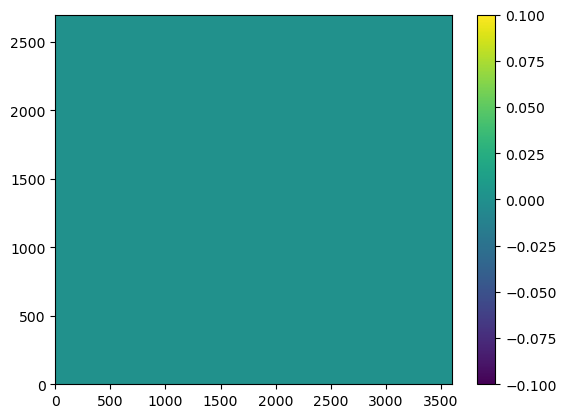

In [19]:
plt.pcolor(np.rad2deg(new_cice_grid.ulat[:-1,:-1].values-old_cice_grid.ulat[1:,1:].values))
plt.colorbar()

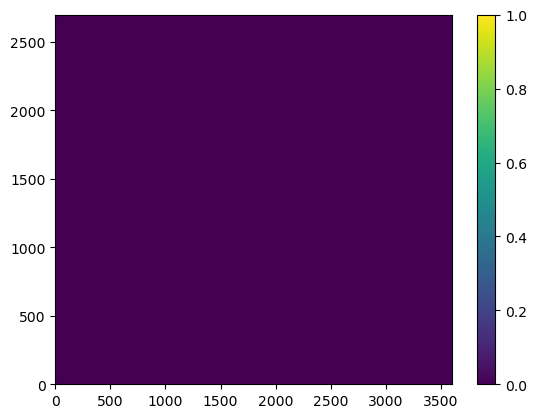

In [20]:
plt.pcolor(np.rad2deg(new_cice_grid.ulon[:-1,:-1].values-old_cice_grid.ulon[1:,1:].values), vmax=1)
plt.colorbar()

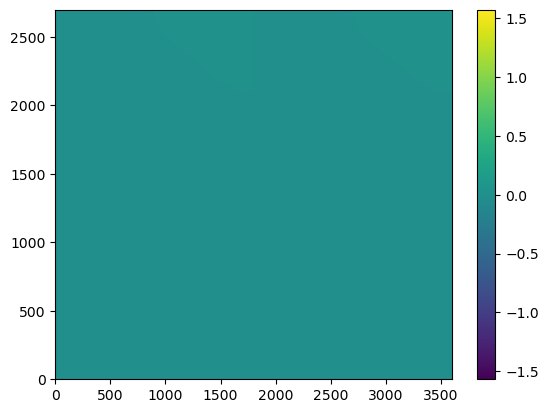

In [22]:
plt.pcolor(new_cice_grid.angle[:-1,:-1].values-old_cice_grid.angle[1:,1:].values)
plt.colorbar()

what is going on with 0.25 deg angle?

In [24]:
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_025deg/grid.nc')
new_cice_grid = xr.open_dataset(f'grid_025deg.nc')


Looks to be the same problem as ulat / ulon, x is offset by 1:

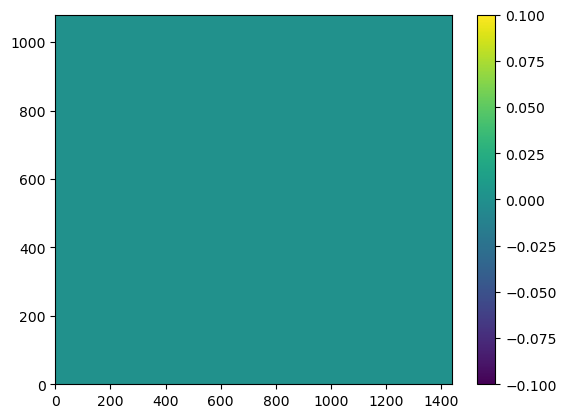

In [25]:
plt.pcolor(new_cice_grid.angle[:,:-1].values-old_cice_grid.angle[:,1:].values)
plt.colorbar()